# Life Expectancy (*WHO*)

###### Credits: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data

https://github.com/sanjeev-kallepalli/training

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Load Data to dataframe

In [2]:
data = pd.read_csv("./data/Life_Expectancy_Data.csv")

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.shape

(2938, 22)

### Overview of DataSet

In [5]:
# null values of dataset 
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

### Features

1. Status - Developed or Developing Status
2. Life Expectancy - Life Expectancy in Age
3. Adult Mortality - Adult mortality rate. Probability of dying between age of 15 - 60 for a sample of 1000
4. infant deaths - number of infants deaths per 1000
5. Alcohol - Alcohol recorded per capita
6. percentage expenditure - expenditure on health
7. Hepatitis B - immunization coverage among 1-year-olds %
8. Measles - cases per 1000

### Description

In [7]:
data.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


In [8]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
ls = [1, 2, 3]
ls.append(4)
print(ls)

[1, 2, 3, 4]


In [10]:
ls = [1, 2, 3]
ls = ls.append(4)
print(ls)

None


In [ ]:
# syntax to rename columns
# data.rename(columns={'old_col':'new_col'}, inplace=True)
# data = data.rename(columns={'old_col':'new_col'})

In [11]:
data.columns = ['COUNTRY', 'YEAR', 'STATUS', 'LIFE_EXPECTANCY', 'ADULT_MORTALITY', 'INFANT_DEATHS', 'ALCOHOL', 'P_EXP',
                'HP_B', 'MEASLES', 'BMI', 'UNDER_5_DEATHS', 'POLIO', 'TOTAL_EXP', 'DIPHTHERIA', 'HIV', 'GDP', 'POPULATION',
                'THINNESS_1-19_YEARS', 'THINNESS_5-9_YEARS', 'INCOME_COMP', 'SCHOOLING']

In [12]:
data.head()

,COUNTRY,YEAR,STATUS,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,P_EXP,HP_B,MEASLES,...,POLIO,TOTAL_EXP,DIPHTHERIA,HIV,GDP,POPULATION,THINNESS_1-19_YEARS,THINNESS_5-9_YEARS,INCOME_COMP,SCHOOLING
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [13]:
data['LIFE_EXPECTANCY'].isnull().sum()

10

In [14]:
data['LIFE_EXPECTANCY'].skew()

-0.6386047358773552

In [15]:
data['LIFE_EXPECTANCY'].kurtosis()

-0.23447739417967428

<AxesSubplot: ylabel='Density'>

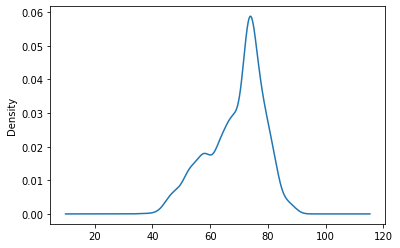

In [16]:
data['LIFE_EXPECTANCY'].plot.kde()

Text(0.5, 0, 'LIFE_EXPECTANCY')

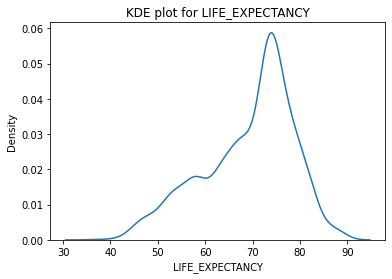

In [17]:

sns.kdeplot(data['LIFE_EXPECTANCY'])
plt.title('KDE plot for LIFE_EXPECTANCY')
plt.xlabel("LIFE_EXPECTANCY")

In [18]:
data['LIFE_EXPECTANCY'].mean(), data['LIFE_EXPECTANCY'].median()

(69.22493169398908, 72.1)

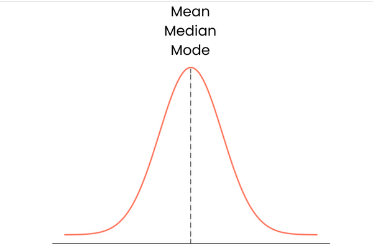

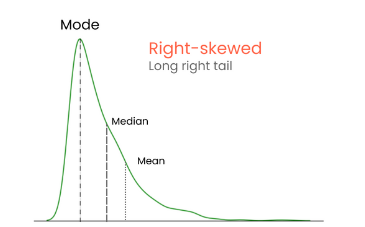

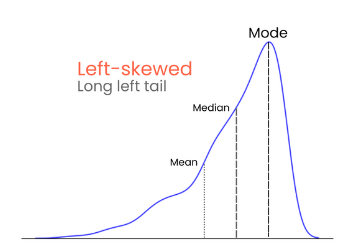

### Create functions

- Function can be helpful for perform repeated tasks.

In [19]:
data['LIFE_EXPECTANCY'].quantile(0.99), data['LIFE_EXPECTANCY'].quantile(0.01)

(86.73000000000002, 45.6)

In [20]:
def handle_nulls(df, col, impute_nulls = False, cap_outliers=False):
    """
    For a continuous column, check the skewness, impute Null values based on distribution.
    Also if required, cap the outliers on higher and lower ends with 99th and 1st quantile.
    """
    try:
        skw = df[col].skew()
        print(f"Col:{col}\nNull values {df[col].isnull().sum()}\nMean: {df[col].mean()}\nMedian: {df[col].median()}")
        # kde plot for the given feature.
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1) # rows columns index
        sns.kdeplot(df[col])
        plt.title(f'KDE plot for {col}')
        plt.xlabel(f"{col}")
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.show()
        if abs(skw)<=0.5:
            print(f"Skewness for {col} is {skw}, considering almost normal")
            if impute_nulls:
                df.loc[df[col].isnull(), col] = df[col].mean()
        else:
            print(f"Skewness for {col} is {skw}, skewness observed")
            if impute_nulls:
                df.loc[df[col].isnull(), col] = df[col].median()
        if cap_outliers:
            df.loc[df[col]>df[col].quantile(0.99), col] = df[col].quantile(0.99)
            df.loc[df[col]<df[col].quantile(0.01), col] = df[col].quantile(0.01)
        return df
    except Exception as e:
        print(f"Error in handle_nulls for {col} due to {e}")

In [21]:
handle_nulls.__doc__

'\n    For a continuous column, check the skewness, impute Null values based on distribution.\n    Also if required, cap the outliers on higher and lower ends with 99th and 1st quantile.\n    '

Col:LIFE_EXPECTANCY
Null values 10
Mean: 69.22493169398908
Median: 72.1


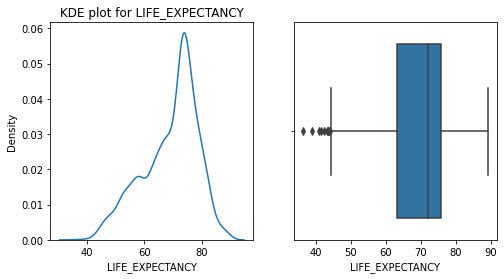

Skewness for LIFE_EXPECTANCY is -0.6386047358773552, skewness observed


In [22]:
data = handle_nulls(data, 'LIFE_EXPECTANCY', impute_nulls=True, cap_outliers=False)

Col:ADULT_MORTALITY
Null values 10
Mean: 164.79644808743168
Median: 144.0


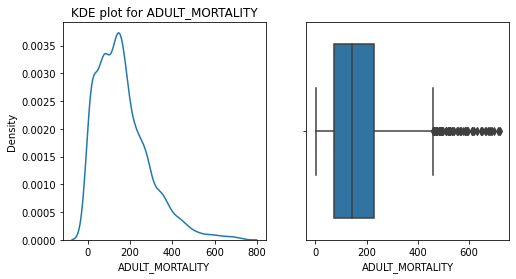

Skewness for ADULT_MORTALITY is 1.1743694876948636, skewness observed


In [23]:
data = handle_nulls(data, 'ADULT_MORTALITY')

Col:ADULT_MORTALITY
Null values 10
Mean: 164.79644808743168
Median: 144.0


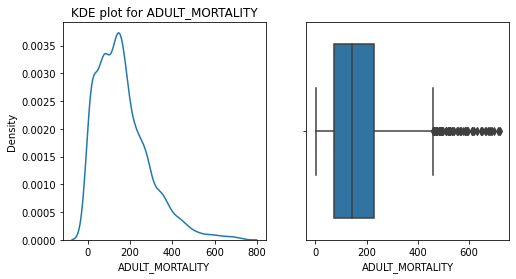

Skewness for ADULT_MORTALITY is 1.1743694876948636, skewness observed


In [24]:
data = handle_nulls(data, 'ADULT_MORTALITY', impute_nulls=True, cap_outliers=True)

Col:ADULT_MORTALITY
Null values 0
Mean: 164.14714091218517
Median: 144.0


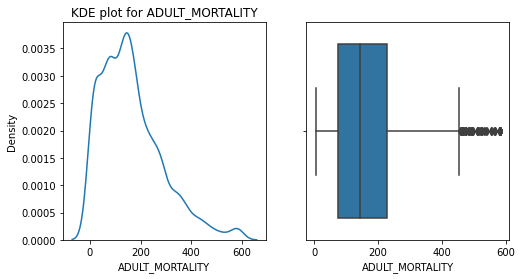

Skewness for ADULT_MORTALITY is 1.044908649978283, skewness observed


In [25]:
data = handle_nulls(data, 'ADULT_MORTALITY', impute_nulls=True, cap_outliers=True)

When the distribution is not normal after capping the outliers, we can try applying transformations like sqrt/log etc.
For now we skip this.

### Handle nulls and outliers for all continuous columns

In [26]:
cols = ['ALCOHOL', 'P_EXP', 'HP_B', 'MEASLES', 'BMI', 'UNDER_5_DEATHS', 'POLIO',
        'TOTAL_EXP', 'DIPHTHERIA', 'HIV', 'GDP', 'POPULATION', 'THINNESS_1-19_YEARS',
        'THINNESS_5-9_YEARS', 'INCOME_COMP', 'SCHOOLING']

Col:ALCOHOL
Null values 194
Mean: 4.602860787172012
Median: 3.755


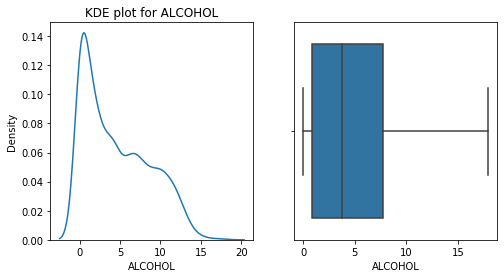

Skewness for ALCOHOL is 0.5895625281160799, skewness observed
Col:P_EXP
Null values 0
Mean: 738.2512954533831
Median: 64.912906045


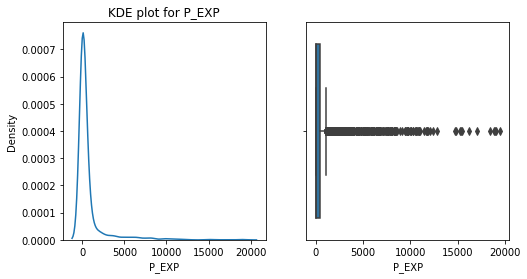

Skewness for P_EXP is 4.6520513478350605, skewness observed
Col:HP_B
Null values 553
Mean: 80.94046121593291
Median: 92.0


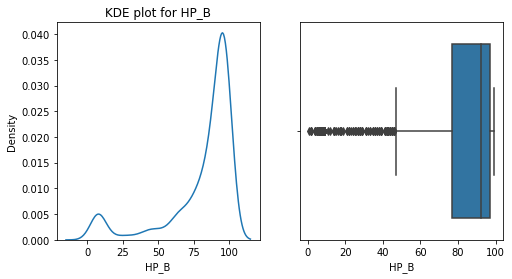

Skewness for HP_B is -1.9308451037678318, skewness observed
Col:MEASLES
Null values 0
Mean: 2419.5922396187884
Median: 17.0


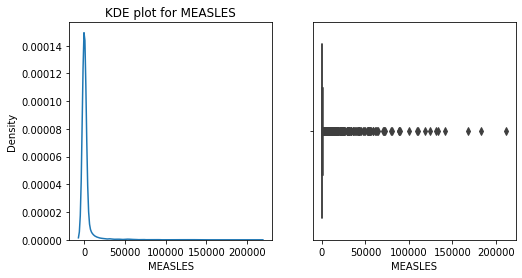

Skewness for MEASLES is 9.441331947061583, skewness observed
Col:BMI
Null values 34
Mean: 38.321246556473824
Median: 43.5


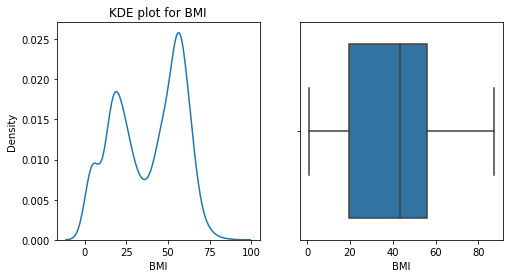

Skewness for BMI is -0.219311603419775, considering almost normal
Col:UNDER_5_DEATHS
Null values 0
Mean: 42.0357385976855
Median: 4.0


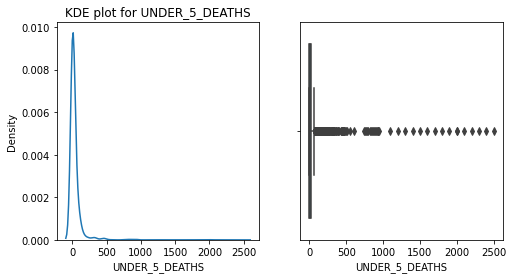

Skewness for UNDER_5_DEATHS is 9.495064656961773, skewness observed
Col:POLIO
Null values 19
Mean: 82.55018842069202
Median: 93.0


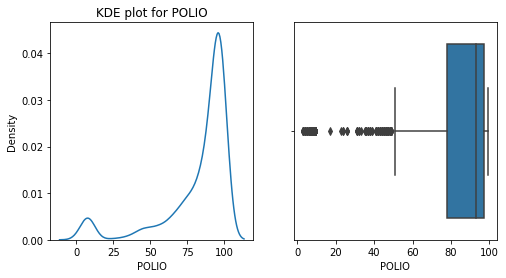

Skewness for POLIO is -2.0980532489729056, skewness observed
Col:TOTAL_EXP
Null values 226
Mean: 5.9381895280235995
Median: 5.755


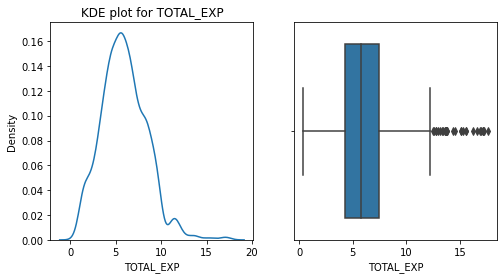

Skewness for TOTAL_EXP is 0.6186855520639749, skewness observed
Col:DIPHTHERIA
Null values 19
Mean: 82.32408359027065
Median: 93.0


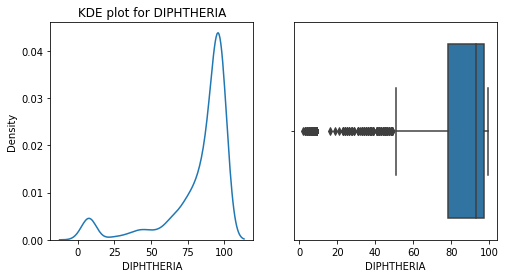

Skewness for DIPHTHERIA is -2.0727529292965605, skewness observed
Col:HIV
Null values 0
Mean: 1.7421034717494894
Median: 0.1


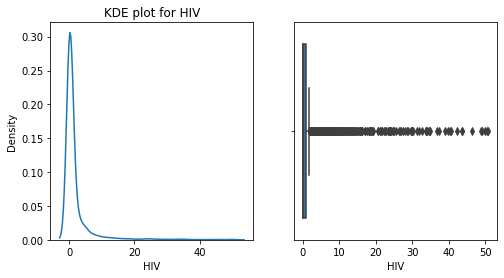

Skewness for HIV is 5.396112042126371, skewness observed
Col:GDP
Null values 448
Mean: 7483.158469138474
Median: 1766.947595


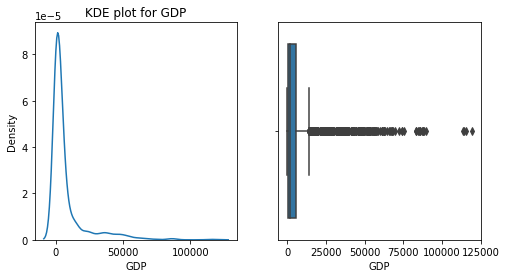

Skewness for GDP is 3.2066548698696393, skewness observed
Col:POPULATION
Null values 652
Mean: 12753375.120052494
Median: 1386542.0


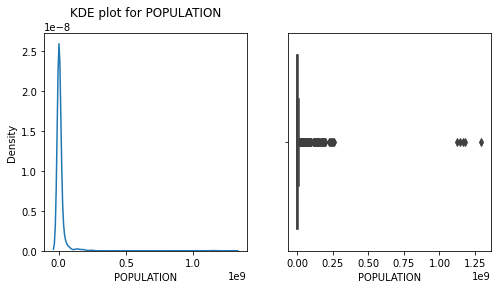

Skewness for POPULATION is 15.916235598428203, skewness observed
Col:THINNESS_1-19_YEARS
Null values 34
Mean: 4.839703856749312
Median: 3.3


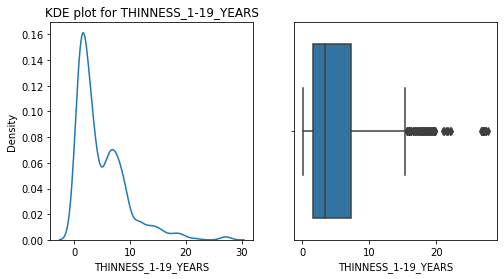

Skewness for THINNESS_1-19_YEARS is 1.7114710881233637, skewness observed
Col:THINNESS_5-9_YEARS
Null values 34
Mean: 4.870316804407714
Median: 3.3


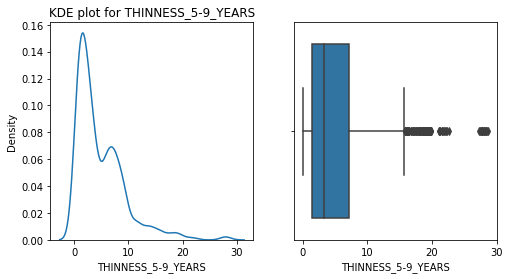

Skewness for THINNESS_5-9_YEARS is 1.777423977376571, skewness observed
Col:INCOME_COMP
Null values 167
Mean: 0.6275510645976182
Median: 0.677


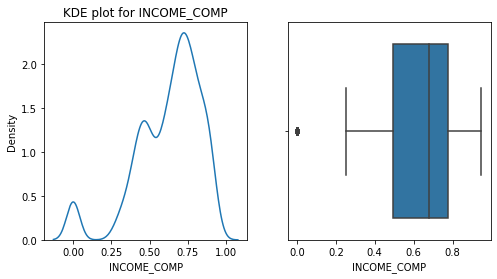

Skewness for INCOME_COMP is -1.143762720185521, skewness observed
Col:SCHOOLING
Null values 163
Mean: 11.992792792792793
Median: 12.3


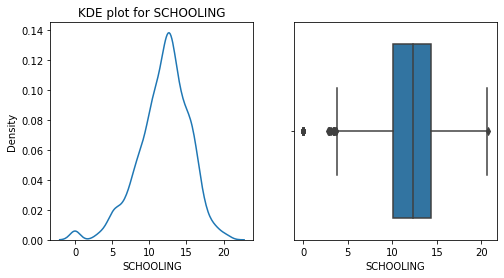

Skewness for SCHOOLING is -0.6024365418785147, skewness observed


In [27]:
for col in cols:
    data = handle_nulls(data, col, impute_nulls=True, cap_outliers=True)

In [28]:
data.isnull().sum()

COUNTRY                0
YEAR                   0
STATUS                 0
LIFE_EXPECTANCY        0
ADULT_MORTALITY        0
INFANT_DEATHS          0
ALCOHOL                0
P_EXP                  0
HP_B                   0
MEASLES                0
BMI                    0
UNDER_5_DEATHS         0
POLIO                  0
TOTAL_EXP              0
DIPHTHERIA             0
HIV                    0
GDP                    0
POPULATION             0
THINNESS_1-19_YEARS    0
THINNESS_5-9_YEARS     0
INCOME_COMP            0
SCHOOLING              0
dtype: int64

### Convert categorical to numerical

In [29]:
data['YEAR'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000], dtype=int64)

In [30]:
data['COUNTRY'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [31]:
data['STATUS'].unique()

array(['Developing', 'Developed'], dtype=object)

In [32]:
label_cols = ['YEAR', 'COUNTRY']
label_encoder = LabelEncoder()

for col in label_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

In [33]:
data.loc[data['STATUS']=='Developing', 'STATUS'] = 0
data.loc[data['STATUS']=='Developed', 'STATUS'] = 1
data['STATUS'] = data['STATUS'].astype('category')

In [34]:
data.head()

,COUNTRY,YEAR,STATUS,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,P_EXP,HP_B,MEASLES,...,POLIO,TOTAL_EXP,DIPHTHERIA,HIV,GDP,POPULATION,THINNESS_1-19_YEARS,THINNESS_5-9_YEARS,INCOME_COMP,SCHOOLING
0,0,15,0,65.0,263.0,62,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,14,0,59.9,271.0,64,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,13,0,59.9,268.0,66,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,12,0,59.5,272.0,69,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,11,0,59.2,275.0,71,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Draw X and y for applying model

In [35]:
X = data.drop('LIFE_EXPECTANCY', axis=1)
y = data['LIFE_EXPECTANCY']

In [36]:
cont_cols = [col for col in data.columns if not col in ['COUNTRY', 'YEAR', 'STATUS', 'LIFE_EXPECTANCY']]
scaler = StandardScaler()
scaler.fit(X[cont_cols])

X[cont_cols] = scaler.transform(X[cont_cols])

In [37]:
X.head()

,COUNTRY,YEAR,STATUS,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,P_EXP,HP_B,MEASLES,BMI,...,POLIO,TOTAL_EXP,DIPHTHERIA,HIV,GDP,POPULATION,THINNESS_1-19_YEARS,THINNESS_5-9_YEARS,INCOME_COMP,SCHOOLING
0,0,15,0,0.812453,0.268824,-1.163857,-0.359809,-0.785881,-0.114889,-0.966642,...,-3.288307,0.974058,-0.737852,-0.351018,-0.478074,1.190790,2.960000,2.929392,-0.738010,-0.611537
1,0,14,0,0.878192,0.285786,-1.163857,-0.358533,-0.916606,-0.203943,-0.991834,...,-1.057059,0.982691,-0.864994,-0.351018,-0.475744,-0.358739,3.031474,2.976266,-0.752647,-0.643219
2,0,13,0,0.853540,0.302749,-1.163857,-0.358706,-0.829456,-0.212284,-1.017027,...,-0.885425,0.961109,-0.780233,-0.351018,-0.474183,1.097806,3.079123,3.023140,-0.781921,-0.674901
3,0,12,0,0.886410,0.328193,-1.163857,-0.355883,-0.698730,0.104785,-1.042219,...,-0.670882,1.129449,-0.653091,-0.351018,-0.471052,-0.202465,3.126772,3.093451,-0.816073,-0.706582
4,0,11,0,0.911062,0.345155,-1.163857,-0.396297,-0.655155,0.135187,-1.062373,...,-0.627973,0.848883,-0.610710,-0.351018,-0.520737,-0.235783,3.198246,3.140325,-0.859983,-0.801627


### Split data into train and validation sets

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=104, train_size=0.80, shuffle=True)

In [40]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((2350, 21), (588, 21), (2350,), (588,))

# Modelling

In [41]:
model = sm.OLS(y_train, X_train).fit()

In [42]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:        LIFE_EXPECTANCY   R-squared (uncentered):                   0.866
Model:                            OLS   Adj. R-squared (uncentered):              0.865
Method:                 Least Squares   F-statistic:                              715.2
Date:                Sat, 27 Jul 2024   Prob (F-statistic):                        0.00
Time:                        18:27:43   Log-Likelihood:                         -10958.
No. Observations:                2350   AIC:                                  2.196e+04
Df Residuals:                    2329   BIC:                                  2.208e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [43]:
lin_reg = LinearRegression()
lin_model = lin_reg.fit(X_train, y_train)

### Prediction

In [44]:
y_val_ols = model.predict(X_val)
y_train_ols = model.predict(X_train)
y_val_lr = lin_model.predict(X_val)
y_train_lr = lin_model.predict(X_train)

### Evaluation

In [45]:
rms_val = mean_squared_error(y_val, y_val_ols, squared=False)
rms_train = mean_squared_error(y_train, y_train_ols, squared=False)
print(f"RMSE in Train {rms_train}\nRMSE in Val {rms_val}")

RMSE in Train 25.63298702366997
RMSE in Val 25.627400614852235


In [46]:
rms_val = mean_squared_error(y_val, y_val_lr, squared=False)
rms_train = mean_squared_error(y_train, y_train_lr, squared=False)
print(f"RMSE in Train {rms_train}\nRMSE in Val {rms_val}")

RMSE in Train 3.9775086102878343
RMSE in Val 4.028529728424617
